# Unsupervised Learning on Country Data

**About organization:**

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.


**Problem Statement:**

HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.metrics import silhouette_score
from matplotlib.cm import get_cmap
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import adjusted_rand_score

In [3]:
df = pd.read_csv('Data/Country-data.csv')
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


## Data Cleaning

In [4]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
dup_df = df.copy()

In [6]:
dup_df['country'].value_counts

<bound method IndexOpsMixin.value_counts of 0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object>

In [7]:
# Check if 'country' column has unique values
unique_country = dup_df['country'].is_unique

print(f"Are all values in 'country' column unique? {unique_country}")

Are all values in 'country' column unique? True


In [8]:
copied_df = dup_df.drop('country', axis = 1)

In [9]:
copied_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Visualization

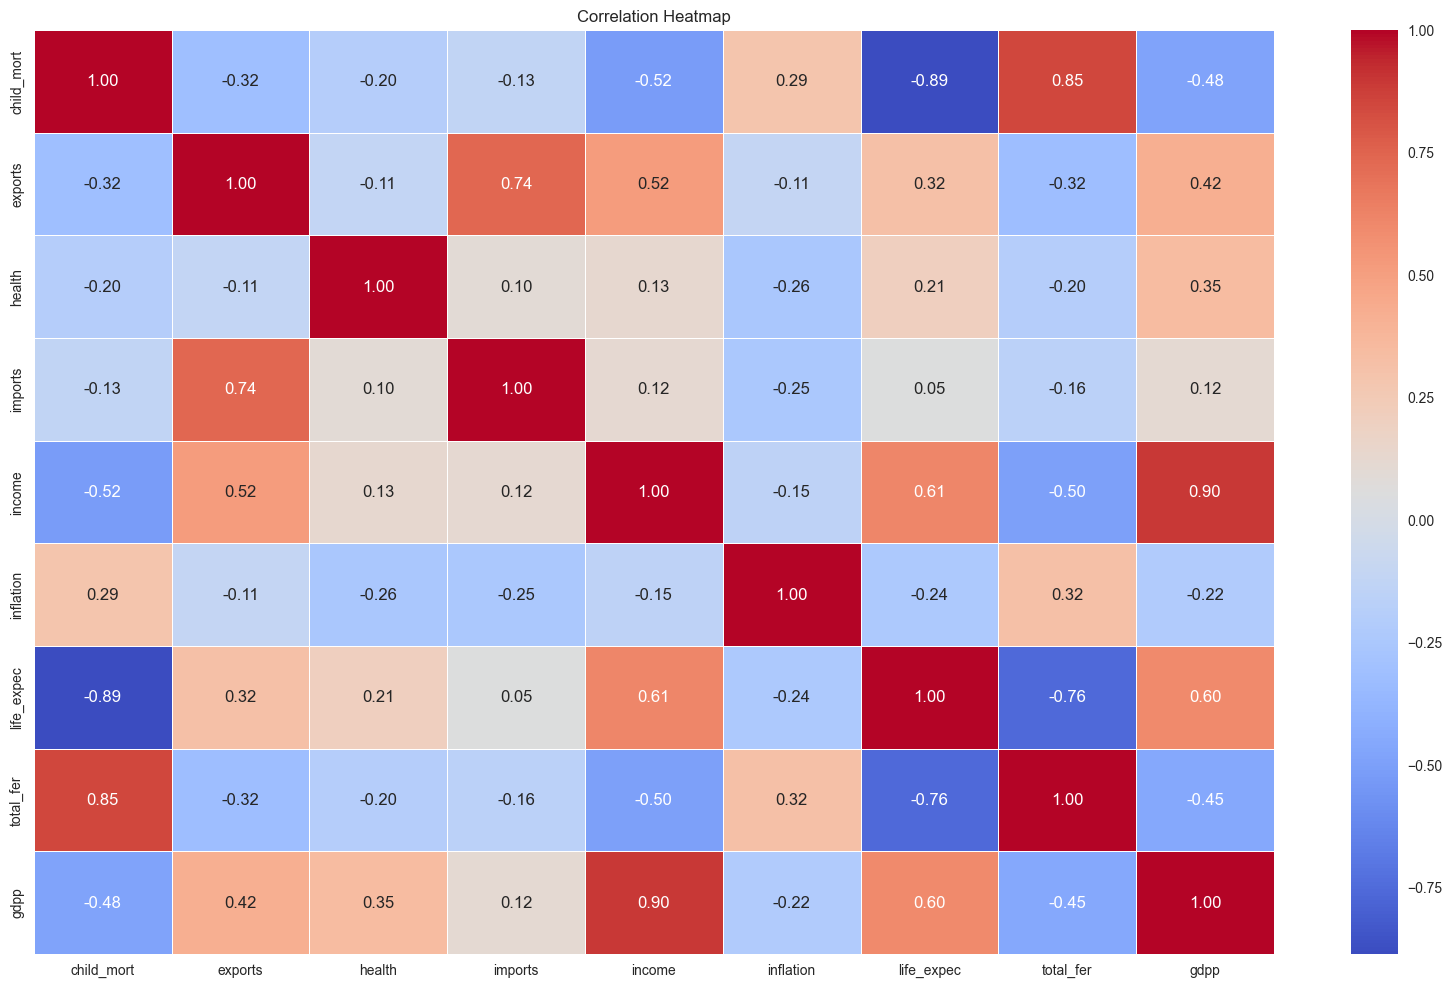

In [10]:

# Calculate the correlation matrix
correlation_matrix = copied_df.corr()
 
# Plot the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
 
#Save the image below
plt.savefig("Correlation Heatmap(Before).png",dpi = 300,bbox_inches ="tight")

plt.show();

## Preprocessing

#### Scaling

In [11]:
copied_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [12]:
scaler = StandardScaler()
scaler.fit(copied_df)
scaled_df_use = pd.DataFrame(scaler.transform(copied_df),columns= copied_df.columns )
scaled_df_use.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


#### Principal component analysis (PCA)

In [13]:
#Initiating PCA to reduce dimentions aka features to 5
pca = PCA(n_components=5)
pca.fit(scaled_df_use)
PCA_use = pd.DataFrame(pca.transform(scaled_df_use), columns=(["PCA1","PCA2", "PCA3", "PCA4", "PCA5"]))
PCA_use.head()

,PCA1,PCA2,PCA3,PCA4,PCA5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007


In [14]:
PCA_use.describe().T

,count,mean,std,min,25%,50%,75%,max
PCA1,167.0,-1.063687e-17,2.039748,-4.912066,-1.382270,0.022407,1.224328,6.917755
PCA2,167.0,5.318434e-17,1.247262,-2.997364,-0.752048,-0.094499,0.553475,6.682090
PCA3,167.0,-5.451394e-17,1.085096,-2.714085,-0.521878,-0.245606,0.402545,6.110158
PCA4,167.0,-3.191060e-17,1.000389,-1.595199,-0.783785,-0.311857,0.710725,3.129643
PCA5,167.0,-1.063687e-17,0.815229,-2.842158,-0.386992,-0.055992,0.301909,5.342700


### Clustering

#### Elbow Graph

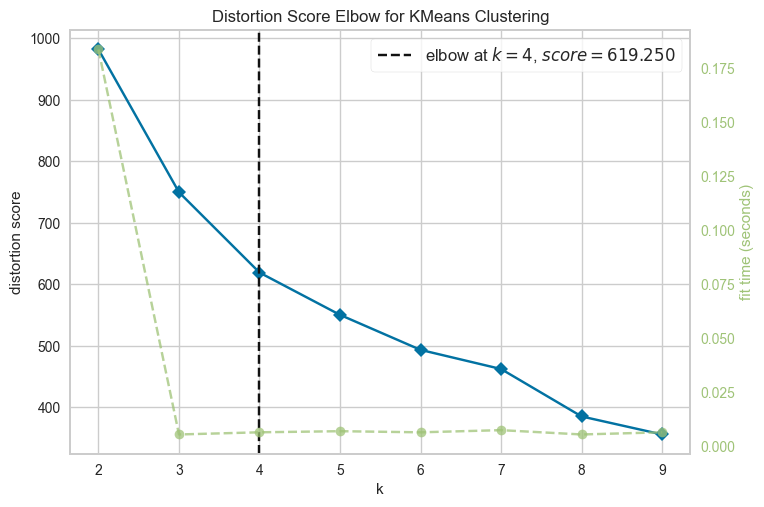

Optimal number of clusters: 4


In [15]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10))  # Search for optimal k from 2 to 10
visualizer.fit(PCA_use)

#Save the image below
plt.savefig("Elbow Graph.png",dpi = 300,bbox_inches ="tight")

visualizer.show()

print("Optimal number of clusters:", visualizer.elbow_value_)

### Compare Original vs PCA Data

#### Kmeans Clustering

##### Perform K-means clustering on original data

In [16]:
model_original = KMeans(n_clusters = visualizer.elbow_value_, random_state = 42)
labels_original = model_original.fit_predict(scaled_df_use)
labels_original 

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 3, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

##### Evaluate Clustering

In [17]:
silhouette_avg = silhouette_score(scaled_df_use.iloc[:, :-1], labels_original )
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.25455983233016954


##### Perform K-means clustering on PCA-transformed data

In [18]:
model_pca_final = KMeans(n_clusters = visualizer.elbow_value_, random_state = 42)
labels_pca = model_pca_final.fit_predict(PCA_use)
labels_pca

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 3, 0, 2, 2, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 3, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

##### Evaluate Clustering

In [19]:
silhouette_avg = silhouette_score(PCA_use.iloc[:, :-1], labels_pca)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.35205167394237397



### Compare Clustering Results

##### **Quantitative Comparison (Adjusted Rand Index)**

Calculate the Adjusted Rand Index (ARI) to measure the similarity between the clustering results of the original and PCA-transformed data.

In [20]:
ari_score = adjusted_rand_score(labels_original, labels_pca)
print("Adjusted Rand Index between Original and PCA-transformed Data:", ari_score)

Adjusted Rand Index between Original and PCA-transformed Data: 0.9249402789621708


**ARI result explained:** The Adjusted Rand Index (ARI) value of 0.925 indicates a high degree of similarity between the clustering results obtained from the original dataset and those from the PCA-transformed dataset. This suggests that the PCA transformation effectively preserved the clustering structure present in the original data. ARI values close to 1 signify strong agreement between the two sets of clustering results, implying that the reduced-dimensional representation captured by PCA components retains essential patterns and relationships necessary for clustering analysis. Therefore, the high ARI value supports the validity and utility of PCA as a method for reducing dimensionality while maintaining the integrity of clustering analyses based on the adjusted similarity measure provided by ARI.

### Add Clusters to original Dataframe

In [21]:
df['cluster'] = labels_pca

df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460,2


In [22]:
cluster_counts = df['cluster'].value_counts()
cluster_counts

cluster
0    89
2    45
1    30
3     3
Name: count, dtype: int64

### Summary

In [23]:
# Calculate the mean Income, and Amount each cluster spent
cluster_summary = df.groupby('cluster').agg({
    'income': 'mean',
    'gdpp': 'mean',
    'child_mort': 'mean',
    'inflation': 'mean',
    'health': 'mean',
    'life_expec': 'mean',
    'total_fer': 'mean',
    'exports': 'mean',
    'imports': 'mean'
    
    
    
}).reset_index()

# Print the cluster summary
cluster_summary

,cluster,income,gdpp,child_mort,inflation,health,life_expec,total_fer,exports,imports
0,0,12969.325843,6885.528090,21.913483,7.533607,6.283483,72.693258,2.318764,41.295382,47.918718
1,1,45250.000000,43333.333333,4.953333,2.742200,9.168667,80.376667,1.795333,45.826667,39.736667
2,2,3539.844444,1766.711111,95.106667,11.986778,6.301111,59.055556,5.065333,28.602444,42.306667
3,3,64033.333333,57566.666667,4.133333,2.468000,6.793333,81.433333,1.380000,176.000000,156.666667


## Cluster Ranking and Names:

Based on the information from the above summary, here is how I rank each cluster. The ranking is based on the values of the parameters and it is done in ascending order:

1. **Cluster 2: Underdeveloped Nations**
   - **Characteristics:** 
     - Lowest income (average: \$3,539)
     - Lowest GDP per capita (average: \$1,767)
     - Highest child mortality rate (average: 95.11)
     - Highest inflation rate (average: 11.99%)
     - Low life expectancy (average: 59.06 years)
     - High total fertility rate (average: 5.07)
     - Moderate exports and imports

   This cluster represents nations with very low income, high child mortality, high inflation, low life expectancy, and high fertility rates, indicating significant socio-economic challenges.

2. **Cluster 0: Developing Nations**
   - **Characteristics:** 
     - Moderate income (average: \$12,969)
     - Moderate GDP per capita (average: \$6,886)
     - Moderate child mortality rate (average: 21.91)
     - Moderate inflation rate (average: 7.53%)
     - Moderate life expectancy (average: 72.69 years)
     - Moderate total fertility rate (average: 2.32)
     - Moderate exports and imports

   This cluster includes nations showing moderate progress across various socio-economic indicators compared to the extremes observed in cluster 2.

3. **Cluster 3: High-Income Nations**
   - **Characteristics:** 
     - High income (average: \$64,033)
     - High GDP per capita (average: \$57,567)
     - Low child mortality rate (average: 4.13)
     - Low inflation rate (average: 2.47%)
     - High life expectancy (average: 81.43 years)
     - Low total fertility rate (average: 1.38)
     - High exports and imports

   This cluster represents economically advanced nations with high income levels, low child mortality rates, low inflation, high life expectancy, and low fertility rates.

4. **Cluster 1: Developed Nations**
   - **Characteristics:** 
     - Highest income (average: \$45,250)
     - High GDP per capita (average: \$43,333)
     - Low child mortality rate (average: 4.95)
     - Low inflation rate (average: 2.74%)
     - High life expectancy (average: 80.38 years)
     - Low total fertility rate (average: 1.80)
     - High exports and imports

   This cluster includes highly developed nations with high income levels, low child mortality rates, low inflation, high life expectancy, and relatively low fertility rates.

### Explanation:
Each cluster is named and categorized based on their average values across income, GDP per capita, child mortality rate, inflation rate, life expectancy, total fertility rate, exports, and imports. This approach provides a clear comparison of socio-economic development levels across different clusters of nations.

### Cluster Distribution

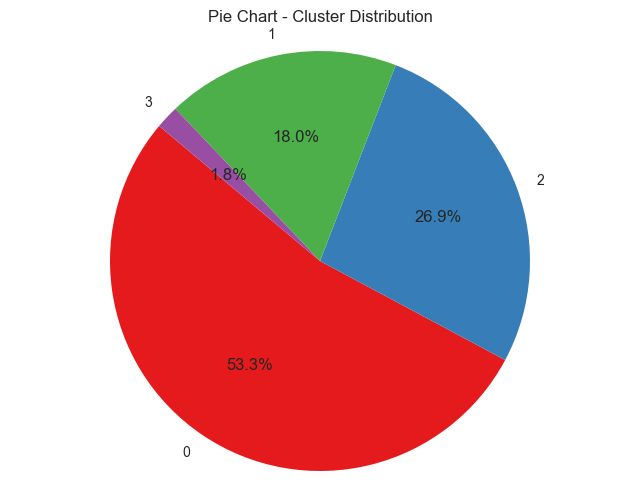

In [24]:
custom_colors = sns.color_palette('Set3', 4)  # Adjust 4 to the number of colors needed


# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Pie Chart - Cluster Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#Save the image below
plt.savefig("Pie Chart(clusters).png",dpi = 300,bbox_inches ="tight")
plt.show()

In [25]:
custom_colors = sns.color_palette('Set1', 3)

#Plotting countplot of clusters
#pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df1["cluster"], palette= custom_colors)
pl.set_title("Bar Chart - Distribution Of The Cluster")
#Save the image below
plt.savefig("Bar chart (clusters).png",dpi = 300,bbox_inches ="tight")
plt.show()

NameError: name 'df1' is not defined

## Countries in Each of the Clusters

In [ ]:
# Create a pivot table with country as index and cluster values as columns
df_pivot = df1.pivot_table(index='country', columns='cluster', aggfunc='size', fill_value=0)

# Reset index to turn the index into a column
df_pivot.reset_index(inplace=True)

# Rename columns to include 'cluster_' prefix
df_pivot.columns = ['country'] + [f'cluster_{col}' for col in df_pivot.columns[1:]]

# Assign DataFrames for each cluster to separate variables
Developing = df_pivot[df_pivot['cluster_0'] > 0][['country', 'cluster_0']].reset_index(drop=True)
Developed = df_pivot[df_pivot['cluster_1'] > 0][['country', 'cluster_1']].reset_index(drop=True)
High_Income = df_pivot[df_pivot['cluster_2'] > 0][['country', 'cluster_2']].reset_index(drop=True) if 'cluster_2' in df_pivot.columns else pd.DataFrame(columns=['country', 'cluster_2'])
Underdeveloped = df_pivot[df_pivot['cluster_3'] > 0][['country', 'cluster_3']].reset_index(drop=True) if 'cluster_3' in df_pivot.columns else pd.DataFrame(columns=['country', 'cluster_3'])

### Display the resulting DataFrames

In [ ]:
print("DataFrame for Developing Countries:")
Developing

DataFrame for Developing Countries:


,country,cluster_0
0,Albania,1
1,Algeria,1
2,Antigua and Barbuda,1
3,Argentina,1
4,Armenia,1
...,...,...
82,Uruguay,1
83,Uzbekistan,1
84,Vanuatu,1
85,Venezuela,1


In [ ]:
print("DataFrame for Developed Countries:")
Developed

DataFrame for Developed Countries:


,country,cluster_1
0,Australia,1
1,Austria,1
2,Bahamas,1
3,Belgium,1
4,Brunei,1
5,Canada,1
6,Cyprus,1
7,Czech Republic,1
8,Denmark,1
9,Finland,1


In [ ]:
print("DataFrame for High Income Countries:")
High_Income

DataFrame for High Income Countries:


,country,cluster_2
0,Luxembourg,1
1,Malta,1
2,Singapore,1


In [ ]:
print("DataFrame for Underdeveloped Countries:")
Underdeveloped

DataFrame for Underdeveloped Countries:


,country,cluster_3
0,Afghanistan,1
1,Angola,1
2,Benin,1
3,Burkina Faso,1
4,Burundi,1
5,Cameroon,1
6,Central African Republic,1
7,Chad,1
8,Comoros,1
9,"Congo, Dem. Rep.",1


### Export each DataFrame to a CSV file

In [ ]:
Developing.to_csv('Developing.csv', index=False)
Developed.to_csv('Developed.csv', index=False)
High_Income.to_csv('High_Income.csv', index=False)
Underdeveloped.to_csv('Underdeveloped.csv', index=False)

## Recommendations to HELP International

Based on the thorough analysis conducted and the comprehensive summary report using key macro-economic indicators, I have formulated targeted recommendations for HELP International pertaining to each cluster:


1. **Cluster 3: Underdeveloped Nations**

This cluster represents countries with severe economic challenges, high child mortality rates, low life expectancy, and high inflation. These countries are in urgent need of support to alleviate poverty and improve basic healthcare and living conditions.


2. **Cluster 0: Developing Nations**

These countries have relatively better economic conditions compared to Cluster 3 but still face challenges such as moderate child mortality and inflation rates. Support could focus on improving healthcare systems and reducing economic vulnerability.


3. **Cluster 2: High-Income Nations**

While these countries have high incomes and development levels, there may still be pockets of poverty and inequality. Support could focus on sustainable development goals, healthcare improvements, and social programs.


4. **Cluster 1: Developed Nations**

These countries have high incomes, stable economic conditions, and strong healthcare systems. Support could focus on sustainable development initiatives, education, and social welfare programs.



### Explanation:

The suggested names and rankings prioritize support to clusters with lower incomes, higher child mortality rates, and poorer health indicators (Clusters 3 and 0). These countries are in greater need of immediate assistance to combat poverty and improve living conditions. Cluster 2, despite high incomes, may still require targeted support in certain areas, while Cluster 1, with the highest incomes and stability, may benefit from strategic partnerships and capacity building rather than direct aid.

This approach aligns with focusing HELP International efforts on countries and regions where poverty and developmental challenges are most acute, ensuring resources are allocated effectively to maximize impact.